# Statistics of MFF survey answers for years 2018 - 2021

## Data collection

Data was collected from SIS's survey of numerical evaluation (rating) of subjects [available here](https://is.cuni.cz/studium/anketa/index.php?do=vysledky&skr=2021&sem=1&co=1&fak=11320)and then parsed into csv files, which are available in this repository.
The file names represent the time from which this data was collected (e.g.: `win18` representing the winter semester of academic year 2018 - 2019)
For each semester we collect the means and standard deviations for all subjects.

### Data structure

For each year there is for each subject the mean and standard deviation of the marks given by students.
The meaning of the marks is following: 1 (best) - 5 (worst).

## Data preprocessing

Firstly we clean the data by removing unwanted lines that are left from the data scraping.
We will not remove any outliers nor add any filtering, because in this dataset these are most probably not statistical anomalies, but real life statistics, as these are already means and standard deviations of other real student votes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os
import warnings

warnings.filterwarnings('ignore')  # We disable pandas warnings, which do not apply for this context

In [2]:
path = "surveys"
files = ['surveys\\win18.csv',  # This is done so that we have files in the right order
         'surveys\\sum18.csv',
         'surveys\\win19.csv',
         'surveys\\sum19.csv',
         'surveys\\win20.csv',
         'surveys\\sum20.csv',
         'surveys\\win21.csv']
df_all = [pd.read_csv(x, sep="\t", encoding="utf-8", header=None) for x in files]

In [3]:
def clean_df(df):
    df = df[df[0] != " "]
    df["mean"] = df[2].map(lambda x: float(x.split(":")[0].replace(",", ".")))
    df["std"] = df[2].map(lambda x: float(x.split(":")[1].replace(",", ".")))
    df = df.rename({0: "name"}, axis=1)
    return df[["name", "mean", "std"]]


cleaned_df = [clean_df(x) for x in df_all]

## First Data analysis

Now let's look at the dataset. With the main focus on semesters of summer 2020 and both winter and summer of 2021 being influenced by the COVID-19 pandemic and therefore being taught virtually.

### Trends
Firstly let's see what the trends in the means of all subject evaluations are.

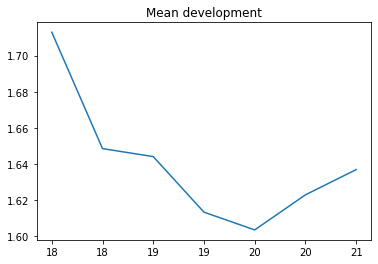

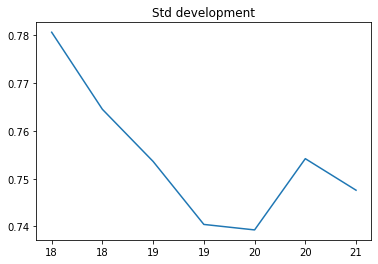

In [4]:
plt.plot([clean_df['mean'].mean() for clean_df in cleaned_df])
plt.xticks(range(len(files)), [x[-6:-4] for x in files])
plt.title("Mean development")
plt.show()
plt.plot([clean_df['std'].mean() for clean_df in cleaned_df])
plt.xticks(range(len(files)), [x[-6:-4] for x in files])
plt.title("Std development")
plt.show()

For the mean value, we can see a steep decrease from the winter semester of 2018 to the summer semester of 2018 and then again a slow decrease until the winter semester of 2020 when we see a start to a slow increase. But all of these changes are less than 10 % of value.
(Just to clarify a lower mark is better, so we see an increase in performance - student satisfaction)

For the standard deviation we can see a similar graph with similar relative scale. This is probably just a result of more grades 1 in the voting, which can be seen already in the development of the mean values.

## Students satisfaction differs between virtual and in-person teaching

In the first test we will try to disprove the null hypothesis that virtual school causes worse (i.e. higher) ratings in the surveys.

For this we will select the virtual semesters (summer 2020, winter 2021, summer 2021) and use the T test against the rest of the dataset.

In [5]:
virtual = pd.concat(cleaned_df[3:6])
in_person = pd.concat(cleaned_df[:3]+[cleaned_df[-1]])
print(scipy.stats.ttest_ind(in_person["mean"], virtual["mean"], alternative="greater"))

Ttest_indResult(statistic=2.200488707855644, pvalue=0.013961546479176924)


0.01 < 0.05. We can reject the hypothesis that students rate subjects better when they go to school in person.
This is a very interesting result, because most other surveys say otherwise. For this reason (and because the distributions aren't perfectly normal I would be careful with this result and suggest more research and data collection on this hypothesis).

# Student satisfaction differs in winter and summer

In this test we will try to disprove the null hypothesis that subjects in winter and summer get marked the same.

In [6]:
winters = pd.concat([cleaned_df[0], cleaned_df[2], cleaned_df[4], cleaned_df[6]])
summers = pd.concat([cleaned_df[1], cleaned_df[3], cleaned_df[5]])

In [7]:
scipy.stats.ttest_ind(winters["mean"], summers["mean"])

Ttest_indResult(statistic=0.8987117571283306, pvalue=0.36894940064637505)

And from the results we see that we can't reject the hypothesis and subjects might get the same results in winter as well in summer

## Final remarks

The first result is surprising when from all places in the faculty the virtual teaching is frowned upon. But as mentioned above I suggest more research done into this statistic.
On the other hand I find unsurprising that there is no difference in marking subjects between summer and winter semesters.

## Last interesting thing

After writing everything I wanted to test if we can find some single semester differences and plotted all T test p values between individual semesters against each other and found out that only the hypotheses that the first semester (winter 2018/19) is better marked than the covid ones can be rejected. (Using a p value of 0.03 because we are pretty far from the normal distribution)

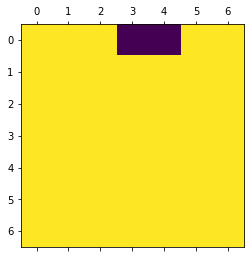

[[0.5        0.07944724 0.03949097 0.01387825 0.00268969 0.03377071
  0.03226545]
 [0.92055276 0.5        0.45950627 0.23469333 0.15019596 0.31285101
  0.3989379 ]
 [0.96050903 0.54049373 0.5        0.23697561 0.14107997 0.32486195
  0.42766546]
 [0.98612175 0.76530667 0.76302439 0.5        0.40922258 0.57428273
  0.70089028]
 [0.99731031 0.84980404 0.85892003 0.59077742 0.5        0.66242613
  0.80126657]
 [0.96622929 0.68714899 0.67513805 0.42571727 0.33757387 0.5
  0.61341522]
 [0.96773455 0.6010621  0.57233454 0.29910972 0.19873343 0.38658478
  0.5       ]]


In [8]:
import numpy as np
results = np.array([[scipy.stats.ttest_ind(x["mean"], y["mean"], alternative="greater").pvalue for y in cleaned_df] for x in cleaned_df])
plt.matshow(results>0.03)
plt.show()
print(results)